# Classification measures

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, plot_confusion_matrix, roc_curve, roc_auc_score, f1_score, auc

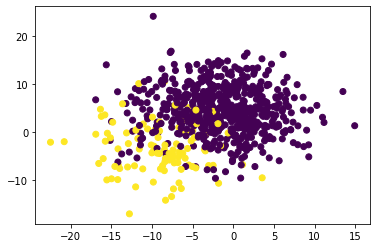

In [2]:
X, y = make_blobs(n_samples = [600, 100], random_state=1, cluster_std=5)

p = plt.scatter(X[:, 0], X[:, 1], c=y)

## Sensitivity and Specificity

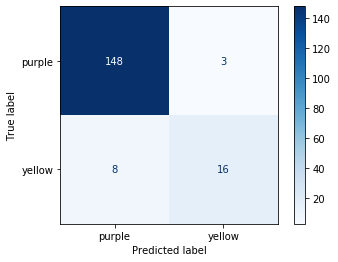

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

p = plot_confusion_matrix(model, X_test, y_test,
                      display_labels=['purple', 'yellow'],
                      cmap=plt.cm.Blues)

This confusion matrix shows, from top to bottom and left to right, the true negatives, false negatives, false positives, and true positives.

Some defined proportions are:

$$\text{True positive rate} = \frac{TP}{TP + FN}$$
$$\text{Sensitivity} = 1 - \text{True positive rate} $$

$$\text{False positive rate} = \frac{FP}{FP + TN}$$
$$\text{Specificity} = 1 - \text{False positive rate} $$


There are more of these: https://en.wikipedia.org/wiki/Sensitivity_and_specificity

In the normalized confusion matrix, the TPR and FPR are in the first and last boxes.


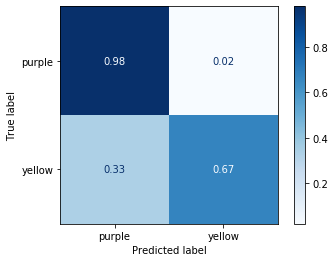

In [4]:
p = plot_confusion_matrix(model, X_test, y_test,
                      display_labels=['purple', 'yellow'],
                      cmap=plt.cm.Blues,
                      normalize='true')

This confusion matrix is for the default cutoff of .5: if a predicted value is less than 0.5 then it's zero (purple), otherwise it's one (yellow).

A cutoff other than 0.5 can be used.  If the predicted value is treated as a probability, then that's saying something like, "we need at least 80% confidence before we label something as purple."

The TPR and FPR are in tension with each other and this cutoff infuences them.

The receiver operating characteristic (ROC) curve shows what happens to the TPR and FPR as this cutoff goes from 0 to 1.

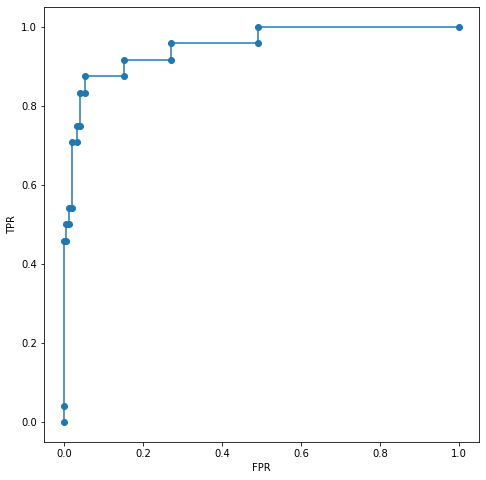

In [5]:
probs = model.predict_proba(X_test)[:, 1] # column 1 to look at TPR/FPR
fpr, tpr, _ = roc_curve(y_test, probs)

_, ax = plt.subplots(figsize=(8,8))
ax.set_aspect('equal', 'box')
plt.xlabel('FPR')
plt.ylabel('TPR')
p = ax.plot(fpr, tpr, marker='o')

The better a classifier, the closer it gets to hugging the upper-left corner of the plot.  One way to quantify the quality of this curve is the area under the curve (AUC).  The closer it is to one the better.  A coinflip has an AUC of 0.5.

The AUC can be used to compare different models on the same data set.  The AUC is useless to compare between data sets.

In [6]:
roc_auc_score(y_test, probs)

0.9508830022075054

## Precision and recall

$$\text{Precision} = \frac{TP}{TP + FP}$$

$$\text{Recall} = \frac{TP}{TP + FN}$$

Recall is the same as sensitivity.  These terms have historical baggage.

These measures can be useful when there is a class imbalance, and there are fewer of the positive class. 

Like an ROC curve, a precision-recall curve plots these for different classification cutoffs. 

The F1 score (the harmonic mean of precision and recall) and the AUC of the precision-recall curve are some measures of overall quality of a classification model.

The AUC of the ROC and the precision-recall curve can't be meaningfully compared.

In [7]:
precision, recall, thresholds = precision_recall_curve(y_test, probs)
auc(recall, precision)

0.8419527883251852

In [8]:
y_pred = model.predict(X_test)
f1_score(y_test, y_pred)

0.744186046511628

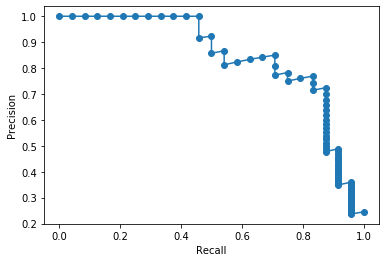

In [9]:
plt.plot(recall, precision, marker='o')
plt.xlabel('Recall')
p = plt.ylabel('Precision')